<a href="https://colab.research.google.com/github/rodolfowenceslau/projetoenem/blob/master/AnaliseExploratoriaDadosEnem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando bibliotecas

In [ ]:
!pip install pandas-profiling=='2.8.0'

     |████████████████████████████████| 266kB 2.7MB/s 
     |████████████████████████████████| 604kB 13.3MB/s 
     |████████████████████████████████| 3.1MB 19.3MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 296kB 33.1MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=86c777132320846ca6d972f93124617fba4261d4d7c06f623e69ce6295f6342c
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=00b8be2426de884f2de68a4e92f4d4928dafebf633340f6a2b6b6176ddd04988
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Un

# Importando bibliotecas

In [ ]:
import pandas as pd
import pandas_profiling as pp
from google.colab import drive

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Montando o caminho do arquivo

In [ ]:
drive.mount('/content/drive/')

#Montar o nome do caminho e arquivo no qual o dataset do ENEM foi salvo no drive
caminhoDoArquivo = "/content/drive/My Drive/Colab Notebooks/data/MICRODADOS_ENEM_2018.csv"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# Lendo o arquivo

In [ ]:
dataframe = pd.read_csv(caminhoDoArquivo, encoding='latin-1', sep=';', nrows=3000000)

In [ ]:
dataframe.shape

(3000000, 137)

In [ ]:
dataframe

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,2018,5300108,Brasília,53,DF,44.0,M,1.0,1,0,NaN,NaN,NaN,NaN,2,0,2,1.0,0,52033333.0,5208707.0,Goiânia,52.0,GO,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,A,1,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A
1,180007197856,2018,2111102,São João dos Patos,21,MA,23.0,F,0.0,3,1,2111102.0,São João dos Patos,21.0,MA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CACBEEDBDDAEAEDDABAAEEAEAEEABAEDAAAACEAABADAA,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,40.0,40.0,60.0,20.0,280.0,B,B,A,A,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A
2,180008517434,2018,3530607,Mogi das Cruzes,35,SP,23.0,F,0.0,1,1,4209300.0,Lages,42.0,SC,1,3,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,B,4,C,A,B,C,B,A,B,A,B,A,B,A,A,B,A,A,B,B,B,B,A,A
3,180007661228,2018,2916401,Itapetinga,29,BA,26.0,F,0.0,3,2,NaN,NaN,NaN,NaN,1,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,4,B,A,B,C,A,A,B,A,A,A,B,A,A,B,B,A,C,A,B,B,A,A
4,180008787987,2018,2918100,Jeremoabo,29,BA,20.0,M,0.0,0,1,2800308.0,Aracaju,28.0,SE,2,0,2,1.0,0,29112699.0,2918100.0,Jeremoabo,29.0,BA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,NaN,1.0,140.0,40.0,40.0,120.0,20.0,360.0,C,E,A,D,3,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,B,B,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,180010880959,2018,4106902,Curitiba,41,PR,17.0,F,0.0,1,1,4106902.0,Curitiba,41.0,PR,2,0,4,1.0,0,41602919.0,4106902.0,Curitiba,41.0,PR,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,EDCAAECBDDBCBCCBCECADBCDABDDCEDCBAEBCDCEACDCA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,140.0,120.0,120.0,120.0,80.0,580.0,G,F,D,D,4,L,A,C,D,C,A,B,A,B,A,B,A,B,B,B,B,E,B,B,B,B,D
2999996,180010281307,2018,3550308,São Paulo,35,SP,20.0,F,0.0,2,1,3550308.0,São Paulo,35.0,SP,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DBCABCCDDBEBACCBABBCDECCECECBDECDCCCCECDAAECA,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,140.0,140.0,160.0,160.0,140.0,740.0,B,F,C,D,4,G,A,B,C,B,A,B,A,A,A,B,A,A,B,B,B,D,B,A,B,A,A
2999997,180010262915,2018,4202404,Blumena

# Utilizando o Pandas Profiling

In [ ]:
pp.ProfileReport(dataframe, minimal=True)

#Código alternativo caso deseje salvar o relatório HTML gerado no GDRIVE
#relatorio1 = pp.ProfileReport(dataframe, minimal=True)
#relatorio1.to_file("/content/drive/My Drive/Colab Notebooks/report/relatorio_1.html")

# Explorando os dados sem o Pandas Profilling

In [ ]:
dataframe.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,2018,5300108,Brasília,53,DF,44.0,M,1.0,1,0,NaN,NaN,NaN,NaN,2,0,2,1.0,0,52033333.0,5208707.0,Goiânia,52.0,GO,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,A,1,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A
1,180007197856,2018,2111102,São João dos Patos,21,MA,23.0,F,0.0,3,1,2111102.0,São João dos Patos,21.0,MA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CACBEEDBDDAEAEDDABAAEEAEAEEABAEDAAAACEAABADAA,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,40.0,40.0,60.0,20.0,280.0,B,B,A,A,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A
2,180008517434,2018,3530607,Mogi das Cruzes,35,SP,23.0,F,0.0,1,1,4209300.0,Lages,42.0,SC,1,3,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,B,4,C,A,B,C,B,A,B,A,B,A,B,A,A,B,A,A,B,B,B,B,A,A
3,180007661228,2018,2916401,Itapetinga,29,BA,26.0,F,0.0,3,2,NaN,NaN,NaN,NaN,1,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,4,B,A,B,C,A,A,B,A,A,A,B,A,A,B,B,A,C,A,B,B,A,A
4,180008787987,2018,2918100,Jeremoabo,29,BA,20.0,M,0.0,0,1,2800308.0,Aracaju,28.0,SE,2,0,2,1.0,0,29112699.0,2918100.0,Jeremoabo,29.0,BA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,NaN,1.0,140.0,40.0,40.0,120.0,20.0,360.0,C,E,A,D,3,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,B,B,B,A


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Columns: 137 entries, NU_INSCRICAO to Q027
dtypes: float64(30), int64(64), object(43)
memory usage: 3.1+ GB


In [ ]:
#Verificar o número de dados ausentes em cada atributo
#Colunas em que a maioria dos valores estão ausentes normalmente indicam irrelevância e são candidatas a serem removidas
serieDadosAusentes = dataframe.isnull().sum()
for itens in serieDadosAusentes.iteritems():
    print(str(itens[0]) + ': ' + str(itens[1]))

NU_INSCRICAO: 0
NU_ANO: 0
CO_MUNICIPIO_RESIDENCIA: 0
NO_MUNICIPIO_RESIDENCIA: 0
CO_UF_RESIDENCIA: 0
SG_UF_RESIDENCIA: 0
NU_IDADE: 32
TP_SEXO: 0
TP_ESTADO_CIVIL: 114987
TP_COR_RACA: 0
TP_NACIONALIDADE: 0
CO_MUNICIPIO_NASCIMENTO: 103998
NO_MUNICIPIO_NASCIMENTO: 103998
CO_UF_NASCIMENTO: 103998
SG_UF_NASCIMENTO: 103998
TP_ST_CONCLUSAO: 0
TP_ANO_CONCLUIU: 0
TP_ESCOLA: 0
TP_ENSINO: 877120
IN_TREINEIRO: 0
CO_ESCOLA: 2126662
CO_MUNICIPIO_ESC: 2126662
NO_MUNICIPIO_ESC: 2126662
CO_UF_ESC: 2126662
SG_UF_ESC: 2126662
TP_DEPENDENCIA_ADM_ESC: 2126662
TP_LOCALIZACAO_ESC: 2126662
TP_SIT_FUNC_ESC: 2126662
IN_BAIXA_VISAO: 0
IN_CEGUEIRA: 0
IN_SURDEZ: 0
IN_DEFICIENCIA_AUDITIVA: 0
IN_SURDO_CEGUEIRA: 0
IN_DEFICIENCIA_FISICA: 0
IN_DEFICIENCIA_MENTAL: 0
IN_DEFICIT_ATENCAO: 0
IN_DISLEXIA: 0
IN_DISCALCULIA: 0
IN_AUTISMO: 0
IN_VISAO_MONOCULAR: 0
IN_OUTRA_DEF: 0
IN_GESTANTE: 0
IN_LACTANTE: 0
IN_IDOSO: 0
IN_ESTUDA_CLASSE_HOSPITALAR: 0
IN_SEM_RECURSO: 0
IN_BRAILLE: 0
IN_AMPLIADA_24: 0
IN_AMPLIADA_18: 0
IN_LEDOR: 0


In [ ]:
dataframe.isnull().sum()

NU_INSCRICAO               0
NU_ANO                     0
CO_MUNICIPIO_RESIDENCIA    0
NO_MUNICIPIO_RESIDENCIA    0
CO_UF_RESIDENCIA           0
                          ..
Q023                       0
Q024                       0
Q025                       0
Q026                       3
Q027                       0
Length: 137, dtype: int64

In [ ]:
#Verificar a porcentagem de dados ausentes em cada atributo
seriePorcentagemAusentes = dataframe.isnull().mean() * 100
for itens in seriePorcentagemAusentes.iteritems():
    print(str(itens[0]) + ': ' + str(itens[1]))

NU_INSCRICAO: 0.0
NU_ANO: 0.0
CO_MUNICIPIO_RESIDENCIA: 0.0
NO_MUNICIPIO_RESIDENCIA: 0.0
CO_UF_RESIDENCIA: 0.0
SG_UF_RESIDENCIA: 0.0
NU_IDADE: 0.0010666666666666667
TP_SEXO: 0.0
TP_ESTADO_CIVIL: 3.8329000000000004
TP_COR_RACA: 0.0
TP_NACIONALIDADE: 0.0
CO_MUNICIPIO_NASCIMENTO: 3.4666
NO_MUNICIPIO_NASCIMENTO: 3.4666
CO_UF_NASCIMENTO: 3.4666
SG_UF_NASCIMENTO: 3.4666
TP_ST_CONCLUSAO: 0.0
TP_ANO_CONCLUIU: 0.0
TP_ESCOLA: 0.0
TP_ENSINO: 29.237333333333332
IN_TREINEIRO: 0.0
CO_ESCOLA: 70.88873333333333
CO_MUNICIPIO_ESC: 70.88873333333333
NO_MUNICIPIO_ESC: 70.88873333333333
CO_UF_ESC: 70.88873333333333
SG_UF_ESC: 70.88873333333333
TP_DEPENDENCIA_ADM_ESC: 70.88873333333333
TP_LOCALIZACAO_ESC: 70.88873333333333
TP_SIT_FUNC_ESC: 70.88873333333333
IN_BAIXA_VISAO: 0.0
IN_CEGUEIRA: 0.0
IN_SURDEZ: 0.0
IN_DEFICIENCIA_AUDITIVA: 0.0
IN_SURDO_CEGUEIRA: 0.0
IN_DEFICIENCIA_FISICA: 0.0
IN_DEFICIENCIA_MENTAL: 0.0
IN_DEFICIT_ATENCAO: 0.0
IN_DISLEXIA: 0.0
IN_DISCALCULIA: 0.0
IN_AUTISMO: 0.0
IN_VISAO_MONOCULAR: 

In [ ]:
dataframe.describe(include='all')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
count,3.000000e+06,3000000.0,3.000000e+06,3000000,3.000000e+06,3000000,2.999968e+06,3000000,2.885013e+06,3.000000e+06,3.000000e+06,2.896002e+06,2896002,2.896002e+06,2896002,3.000000e+06,3.000000e+06,3.000000e+06,2.122880e+06,3.000000e+06,8.733380e+05,8.733380e+05,873338,873338.000000,873338,873338.000000,873338.000000,873338.000000,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,...,2232174,3.000000e+06,2232174,2356656,2356656,2232174,2.356656e+06,2.356656e+06,2.356656e+06,2.356656e+06,2.356656e+06,2.356656e+06,2.356656e+06,3000000,3000000,3000000,3000000,3.000000e+06,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,2999997,3000000
unique,NaN,NaN,NaN,5299,NaN,27,NaN,2,NaN,NaN,NaN,NaN,5270,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5257,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2230622,NaN,7,9,8,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8,6,6,NaN,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2,4,6
top,NaN,NaN,NaN,São Paulo,NaN,SP,NaN,F,NaN,NaN,NaN,NaN,São Paulo,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,São Paulo,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,.............................................,NaN,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,B,NaN,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,B,B,A,A
freq,NaN,NaN,NaN,142028,NaN,493242,NaN,1859691,NaN,NaN,NaN,NaN,163365,NaN,477678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44703,NaN,171360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,427,NaN,561847,591553,591743,561847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750399,948872,732247,1369001,NaN,842886,2814010,2211760,1545078,1804772,2367150,2838992,2003622,1687113,2688770,1538097,2937768,2494297,2119829,1880159,2355996,967788,2177683,1388709,2205287,1723545,2357351
mean,1.800089e+11,2018.0,3.094265e+06,NaN,3.079262e+01,NaN,2.201831e+01,NaN,1.099229e-01,2.155161e+00,1.039266e+00,3.063763e+06,NaN,3.048609e+01,NaN,1.530062e+00,2.809609e+00,1.382093e+00,1.183350e+00,7.725033e-02,3.134020e+07,3.135875e+06,NaN,31.205042,NaN,2.312959,1.031266,1.005555,8.423333e-04,8.333333e-05,1.490000e-04,2.910000e-04,6.666667e-07,1.589333e-03,2.793333e-04,8.910000e-04,1.353333e-04,3.233333e-05,9.666667e-05,2.450000e-04,...,NaN,5.367677e-01,NaN,NaN,NaN,NaN,1.093518e+00,1.226617e+02,1.036820e+02,9.879881e+01,1.186297e+02,7.474570e+01,5.185181e+02,NaN,NaN,NaN,NaN,3.909276e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.003842e+06,0.0,9.875286e+05,NaN,9.845571e+00,NaN,7.243657e+00,NaN,3.606242e-01,1.012189e+00,2.298722e-01,9.704750e+05,NaN,9.670776e+00,NaN,6.895185e-01,3.871457e+00,7.325555e-01,5.731197e-01,2.669883e-01,9.625608e+06,9.662566e+05,NaN,9.632990,NaN,0.

In [ ]:
dataframe.corr()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,1.000000,NaN,-0.009205,-0.009244,-0.012722,-0.007163,-0.001940,0.000625,-0.009219,-0.009249,0.026486,-0.015436,0.006984,0.000783,0.032791,-0.004712,-0.004465,-0.004639,0.010232,0.012929,0.000471,0.001058,0.003203,0.003406,0.003188,0.000754,-0.000253,0.003625,0.006602,0.004141,0.000666,0.001929,0.000598,0.003257,0.000616,-0.001274,0.000187,0.000465,-0.001384,0.003286,...,0.001050,-0.000164,-0.000578,0.000453,-0.000516,0.000316,0.000843,0.000746,-0.000691,-0.001057,0.001281,0.001451,0.000044,0.001593,0.001068,-0.000280,-0.001210,-0.009175,-0.009210,-0.008736,-0.008636,-0.008636,-0.008736,0.001384,0.000100,0.000360,0.000542,-0.004447,-0.014924,-0.012261,0.003870,0.000611,0.007324,-0.010670,-0.006379,-0.005835,-0.010798,-0.015834,-0.011359,0.010973
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.009205,NaN,1.000000,0.999861,-0.042163,-0.000313,-0.226016,0.003739,0.877485,0.877340,0.043084,-0.052097,0.041159,0.028847,0.021744,0.998248,0.998507,0.998360,0.061793,-0.036443,-0.011775,-0.002109,-0.001792,-0.002557,0.000201,-0.000055,-0.001285,0.000436,0.010203,0.002408,0.000058,0.001970,-0.000361,0.002743,-0.002785,-0.001110,-0.000586,0.001319,-0.000363,-0.002246,...,0.000574,0.000392,0.000129,-0.000080,0.000714,0.003950,0.000436,0.000979,0.001630,0.000375,0.000882,0.001315,0.000899,0.000047,0.001145,0.000623,0.000921,0.994372,0.994225,-0.023612,-0.019237,-0.019237,-0.023612,-0.001366,-0.004563,-0.004220,-0.000849,0.126212,0.126307,0.144067,0.108769,-0.108002,-0.022464,0.061223,0.066661,0.067059,0.029644,0.038926,0.060842,-0.128786
CO_UF_RESIDENCIA,-0.009244,NaN,0.999861,1.000000,-0.041570,-0.000035,-0.224719,0.003660,0.876919,0.876986,0.043021,-0.051796,0.040750,0.029213,0.021734,0.998321,0.998362,0.998503,0.060962,-0.035817,-0.011682,-0.002095,-0.001785,-0.002525,0.000203,-0.000066,-0.001277,0.000480,0.010164,0.002364,0.000042,0.001991,-0.000341,0.002743,-0.002750,-0.001029,-0.000588,0.001257,-0.000306,-0.002248,...,0.000590,0.000368,0.000131,-0.000081,0.000716,0.003928,0.000442,0.000972,0.001637,0.000376,0.000859,0.001302,0.000899,0.000060,0.001157,0.000611,0.000901,0.994242,0.994351,-0.023516,-0.019138,-0.019138,-0.023516,-0.001380,-0.004584,-0.004235,-0.000858,0.125029,0.125170,0.142776,0.107572,-0.105885,-0.022224,0.060646,0.065902,0.066296,0.029279,0.038432,0.060150,-0.128302
NU_IDADE,-0.012722,NaN,-0.042163,-0.041570,1.000000,0.552955,0.041208,-0.019931,-0.062627,-0.062061,-0.405993,0.772965,-0.283699,0.22

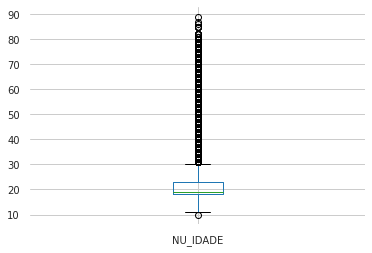

In [ ]:
dataframe.boxplot(column='NU_IDADE')

# Preparação dos dados

### Criando uma cópia do nosso dataframe

In [ ]:
enem = dataframe.copy(deep=True)

In [ ]:
enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,2018,5300108,Brasília,53,DF,44.0,M,1.0,1,0,NaN,NaN,NaN,NaN,2,0,2,1.0,0,52033333.0,5208707.0,Goiânia,52.0,GO,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,A,1,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A
1,180007197856,2018,2111102,São João dos Patos,21,MA,23.0,F,0.0,3,1,2111102.0,São João dos Patos,21.0,MA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CACBEEDBDDAEAEDDABAAEEAEAEEABAEDAAAACEAABADAA,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,40.0,40.0,60.0,20.0,280.0,B,B,A,A,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A
2,180008517434,2018,3530607,Mogi das Cruzes,35,SP,23.0,F,0.0,1,1,4209300.0,Lages,42.0,SC,1,3,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,B,4,C,A,B,C,B,A,B,A,B,A,B,A,A,B,A,A,B,B,B,B,A,A
3,180007661228,2018,2916401,Itapetinga,29,BA,26.0,F,0.0,3,2,NaN,NaN,NaN,NaN,1,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,4,B,A,B,C,A,A,B,A,A,A,B,A,A,B,B,A,C,A,B,B,A,A
4,180008787987,2018,2918100,Jeremoabo,29,BA,20.0,M,0.0,0,1,2800308.0,Aracaju,28.0,SE,2,0,2,1.0,0,29112699.0,2918100.0,Jeremoabo,29.0,BA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,NaN,1.0,140.0,40.0,40.0,120.0,20.0,360.0,C,E,A,D,3,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,B,B,B,A


### Criação de colunas derivadas

In [ ]:
#Criação da coluna SOMA_NOTAS no Dataset que receberá a soma de cada uma das notas envolvidas
enem["SOMA_NOTAS"] = enem["NU_NOTA_CN"] + enem["NU_NOTA_CH"] + enem["NU_NOTA_LC"] + enem["NU_NOTA_MT"] + enem["NU_NOTA_REDACAO"]
enem["SOMA_NOTAS"]

0             NaN
1          2363.1
2             NaN
3             NaN
4             NaN
            ...  
2999995    2863.8
2999996    3019.1
2999997    2873.0
2999998    2548.4
2999999    2982.1
Name: SOMA_NOTAS, Length: 3000000, dtype: float64

In [ ]:
#Criação da coluna MEDIA_NOTAS no Dataset que receberá a média simples das notas
enem["MEDIA_NOTAS"] = enem["SOMA_NOTAS"] / 5
enem["MEDIA_NOTAS"]

0             NaN
1          472.62
2             NaN
3             NaN
4             NaN
            ...  
2999995    572.76
2999996    603.82
2999997    574.60
2999998    509.68
2999999    596.42
Name: MEDIA_NOTAS, Length: 3000000, dtype: float64

In [ ]:
#Cálculo da mediana da coluna MEDIA_NOTAS
mediana = enem["MEDIA_NOTAS"].median()
mediana

522.6

In [ ]:
media = enem["MEDIA_NOTAS"].mean()
media

531.7192803238875

###Criação da classe alvo com base em critério

In [ ]:
#Criação da coluna alvo PASSOU_ENEM atribuindo o rótulo "Sim" ou "Não" caso a coluna MEDIA_NOTAS seja superior a mediana
enem.loc[enem["MEDIA_NOTAS"] <= mediana, "PASSOU_ENEM"] = "Nao"
enem.loc[enem["MEDIA_NOTAS"] > mediana, "PASSOU_ENEM"] = "Sim"
enem["PASSOU_ENEM"]

0          NaN
1          Nao
2          NaN
3          NaN
4          NaN
          ... 
2999995    Sim
2999996    Sim
2999997    Sim
2999998    Nao
2999999    Sim
Name: PASSOU_ENEM, Length: 3000000, dtype: object

In [ ]:
#Verificação do tamanho do dataset neste momento
enem.shape

(3000000, 140)

In [ ]:
dataframe.shape

(3000000, 137)

### Verificação do balanceamento da classe alvo

In [ ]:
#Verificação do balanceamento da classe alvo (quantidade de elementos atribuídos para cada rótulo)
enem.PASSOU_ENEM.value_counts(dropna=False)

Nao    1113410
Sim    1113175
NaN     773415
Name: PASSOU_ENEM, dtype: int64

### Remoção de linhas nas quais a coluna alvo possui algum valor nulo (NaN)

In [ ]:
#Remoção de Linhas nas quais a coluna alvo (PASSOU_ENEM) possui algum valor nulo (NaN)
enem.dropna(subset = ["PASSOU_ENEM"], inplace=True)
enem.PASSOU_ENEM.value_counts(dropna=False)

Nao    1113410
Sim    1113175
Name: PASSOU_ENEM, dtype: int64

### Verificação das colunas que possuem valores ausentes para remoção

In [ ]:
serieDadosAusentes = enem.isnull().sum()
for itens in serieDadosAusentes.iteritems():
    if(itens[1]>0):   #significa que a coluna possui dados ausentes
      print(str(itens[0]) + ': ' + str(itens[1]))

NU_IDADE: 21
TP_ESTADO_CIVIL: 68950
CO_MUNICIPIO_NASCIMENTO: 76916
NO_MUNICIPIO_NASCIMENTO: 76916
CO_UF_NASCIMENTO: 76916
SG_UF_NASCIMENTO: 76916
TP_ENSINO: 672200
CO_ESCOLA: 1497840
CO_MUNICIPIO_ESC: 1497840
NO_MUNICIPIO_ESC: 1497840
CO_UF_ESC: 1497840
SG_UF_ESC: 1497840
TP_DEPENDENCIA_ADM_ESC: 1497840
TP_LOCALIZACAO_ESC: 1497840
TP_SIT_FUNC_ESC: 1497840
Q026: 3


In [ ]:
#Criação de lista para receber os atributos que serão removidos
colunasParaRemocaoAusentes =[]

serieDadosAusentes = enem.isnull().sum()
for itens in serieDadosAusentes.iteritems():
    #Colunas com mais de 30000 registros (1%) serão selecionadas para remoção
    if(itens[1]>30000):                          
      colunasParaRemocaoAusentes.append(str(itens[0]))

print(colunasParaRemocaoAusentes)

['TP_ESTADO_CIVIL', 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ENSINO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC']


### Remoção das colunas selecionadas anteriormente e tamanho atual do dataset

In [ ]:
enem = enem.drop(columns=colunasParaRemocaoAusentes)
enem.shape

(2226585, 126)

### Remoção das linhas das colunas mantidas (NU_IDADE e Q026)

In [ ]:
#Remoção das linhas (registros) que possuem valores nulos nas colunas NU_IDADE e Q026
enem.dropna(subset = ['NU_IDADE','Q026'], inplace=True)

In [ ]:
enem.shape

(2226561, 126)

## Remoção das colunas com base na opinião de um especialista

In [ ]:
#Descartar colunas por serem irrelevantes para o objetivo do negócio (Ponto de vista do especialista)
colunasParaRemocaoEspecialista = ["NU_INSCRICAO", "NU_ANO", "CO_MUNICIPIO_RESIDENCIA", "CO_UF_RESIDENCIA", "IN_BAIXA_VISAO", "IN_CEGUEIRA", "IN_SURDEZ", "IN_DEFICIENCIA_AUDITIVA", "IN_SURDO_CEGUEIRA", "IN_DEFICIENCIA_FISICA", "IN_DEFICIENCIA_MENTAL", "IN_DEFICIT_ATENCAO", "IN_DISLEXIA", "IN_DISCALCULIA", "IN_AUTISMO", "IN_VISAO_MONOCULAR", "IN_OUTRA_DEF", "IN_GESTANTE", "IN_LACTANTE", "IN_IDOSO", "IN_ESTUDA_CLASSE_HOSPITALAR", "IN_SEM_RECURSO", "IN_BRAILLE", "IN_AMPLIADA_24", "IN_AMPLIADA_18", "IN_LEDOR", "IN_ACESSO", "IN_TRANSCRICAO", "IN_LIBRAS", "IN_LEITURA_LABIAL", "IN_MESA_CADEIRA_RODAS", "IN_MESA_CADEIRA_SEPARADA", "IN_APOIO_PERNA", "IN_GUIA_INTERPRETE", "IN_COMPUTADOR", "IN_CADEIRA_ESPECIAL", "IN_CADEIRA_CANHOTO", "IN_CADEIRA_ACOLCHOADA", "IN_PROVA_DEITADO", "IN_MOBILIARIO_OBESO", "IN_LAMINA_OVERLAY", "IN_PROTETOR_AURICULAR", "IN_MEDIDOR_GLICOSE", "IN_SOROBAN", "IN_MARCA_PASSO", "IN_SONDA", "IN_MEDICAMENTOS", "IN_SALA_INDIVIDUAL","IN_SALA_ESPECIAL", "IN_SALA_ACOMPANHANTE", "IN_MOBILIARIO_ESPECIFICO", "IN_MATERIAL_ESPECIFICO", "IN_NOME_SOCIAL", "CO_MUNICIPIO_PROVA", "CO_UF_PROVA","CO_PROVA_CN", "CO_PROVA_CH", "CO_PROVA_LC", "CO_PROVA_MT", "TX_RESPOSTAS_CN", "TX_RESPOSTAS_CH", "TX_RESPOSTAS_LC", "TX_RESPOSTAS_MT", "TX_GABARITO_CN", "TX_GABARITO_CH","TX_GABARITO_LC", "TX_GABARITO_MT"]
print(colunasParaRemocaoEspecialista)

['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS', 'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS', 'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE', 'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO', 'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO', 'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE', 'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA', 'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL', 'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO', 'IN_MATER

In [ ]:
enem = enem.drop(columns=colunasParaRemocaoEspecialista)

## Remoção das colunas que só teríamos acesso após as Provas

In [ ]:
# Remoção das colunas que só teríamos acesso após as Provas
colunasParaRemocaoAposProva = ["TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT", "TP_STATUS_REDACAO", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]
enem = enem.drop(columns=colunasParaRemocaoAposProva)

## Remoção das colunas que representam um Leaky Features (causam vazamento de informações)

In [ ]:
#Descartar colunas que causam vazamento de informações (leaky features), dependerá dos objetivos definidos pela área de negócio (problema a ser resolvido, pergunta a ser respondida, ...)
#Leaky features são aquelas variáveis que contém dados sobre o futuro ou o objetivo (clase alvo)
#Normalmente, possuem forte relação ou foram utilizadas para calcular a coluna alvo
colunasParaRemocaoLeakyFeature = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "SOMA_NOTAS", "MEDIA_NOTAS"]
enem = enem.drop(columns=colunasParaRemocaoLeakyFeature)

In [ ]:
#Transformar o dataframe no novo arquivo CSV
path = "/content/drive/My Drive/Colab Notebooks/data/"
enem.to_csv(path + "MICRODADOS_ENEM_2018_TRATADO_FINAL.csv", sep=",",  index=False)

In [ ]:
#Impressão da quantidade de linhas e colunas do dataframe original
print(dataframe.shape)

#Impressão da quantidade de linhas e colunas do dataframe transformado/tratado
print(enem.shape)

(3000000, 137)
(2226561, 42)
